# **Ringkasan Berita**

##Import Modul

In [ ]:
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import nltk
import re
import joblib

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Fungsi dari modul-modul diatas, antara lain adalah untuk :
- Mendefinisikan fungsi untuk membersihkan dan memproses data teks: Fungsi-fungsi ini menghapus karakter yang tidak relevan, mengubah teks menjadi huruf kecil, dan menghapus kata-kata berhenti (kata-kata umum yang tidak menambah banyak makna pada sebuah kalimat).

- Membuat vektorizer TF-IDF: Vektorizer ini mengubah dokumen teks menjadi vektor numerik yang mewakili frekuensi setiap istilah dalam dokumen.

- Melatih dan mengevaluasi model pembelajaran mesin: Kode ini melatih pengklasifikasi Bayes yang naif dan pengklasifikasi SVM pada vektor TF-IDF dari data pelatihan dan mengevaluasi kinerjanya pada data pengujian menggunakan metrik seperti akurasi, presisi, perolehan, dan skor F1 .

- Memvisualisasikan hasilnya: Kode menggunakan networkx untuk membuat grafik yang mewakili hubungan antar dokumen dan menggunakan seaborn untuk membuat peta panas yang menunjukkan kesamaan kosinus antar dokumen.

##Menampilkan Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PPW/TUGAS/Data Berita newsdetik.csv')
df

,Judul,Tanggal,Artikel,Category
0,"Gus Imin Janjikan Khitan Ditanggung JKN, BPJS ...","Senin, 27 Nov 2023 13:44 WIB",Cawapres nomor urut 1 Muhaimin Iskandar atau G...,Finance
1,Kementerian BUMN Punya Solusi Selamatkan Waski...,"Senin, 27 Nov 2023 13:43 WIB",Saham PT Waskita Karya (Persero) Tbk terancam ...,Finance
2,"Sedot Sepertiga Uang Negara, Pemda Diminta Mel...","Senin, 27 Nov 2023 13:33 WIB","Menteri Keuangan, Sri Mulyani Indrawati, menje...",Finance
3,Pertagas Raih Gold Rating di Ajang Asia Sustai...,"Senin, 27 Nov 2023 13:31 WIB",PT Pertamina Gas (Pertagas) yang merupakan bag...,Finance
4,Petani Tembakau Jabar Ramai-ramai Tolak Aturan...,"Senin, 27 Nov 2023 13:28 WIB",Ratusan petani dan komunitas pertembakauan di ...,Finance
...,...,...,...,...
1617,"Seandainya Ada Team Order dari Ducati, Jorge M...","Senin, 09 Okt 2023 20:10 WIB",Persaingan ketat di antara Francesco Bagnaia d...,Sport
1618,"Yamaha Mau VR46 Racing Jadi Tim Satelit, tapi...","Senin, 09 Okt 2023 19:30 WIB",Yamaha ingin mempunyai tim satelit lagi musim ...,Sport
1619,Tim Kempo Indonesia Sabet 4 Emas di Kejuaraan ...,"Senin, 09 Okt 2023 18:50 WIB",Tim Kempo Indonesia bersinar di Negeri Sakura ...,Sport
1620,Jadwal MotoGP Mandalika Akhir Pekan Ini,"Senin, 09 Okt 2023 18:15 WIB",Jadwal MotoGP Mandalika akhir pekan ini bisa d...,Sport


##Membersihkan Data

In [ ]:
df.isnull().sum()

Judul       0
Tanggal     0
Artikel     0
Category    0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

Judul       0
Tanggal     0
Artikel     0
Category    0
dtype: int64

In [ ]:
df.shape

(1622, 4)

##Menghapus karakter yang tidak perlu



Langkah ini menghilangkan tanda baca dan karakter lain yang tidak relevan dari teks.

In [ ]:
def cleaning(text):
  text = re.sub(r'[^\w\s.?!,]', '', text).strip()
  return text

df['Cleaning'] = df['Artikel'].apply(cleaning)
df['Cleaning']

0       Cawapres nomor urut 1 Muhaimin Iskandar atau G...
1       Saham PT Waskita Karya Persero Tbk terancam di...
2       Menteri Keuangan, Sri Mulyani Indrawati, menje...
3       PT Pertamina Gas Pertagas yang merupakan bagia...
4       Ratusan petani dan komunitas pertembakauan di ...
                              ...                        
1617    Persaingan ketat di antara Francesco Bagnaia d...
1618    Yamaha ingin mempunyai tim satelit lagi musim ...
1619    Tim Kempo Indonesia bersinar di Negeri Sakura ...
1620    Jadwal MotoGP Mandalika akhir pekan ini bisa d...
1621    Bank Tabungan Negara BTN menggelar acara 42K D...
Name: Cleaning, Length: 1622, dtype: object

##Tokenizing

Tokenisasi memecah teks menjadi unit-unit yang lebih kecil, seperti kata atau kalimat, yang kemudian dapat dianalisis atau diproses dengan lebih mudah. Selanjutnya dilakukan pengelompokkan teks menjadi kalimat, sehingga memungkinkan dilakukannya analisis tingkat kalimat.

In [ ]:
def tokenizer(text):
  text = text.lower()
  return sent_tokenize(text)

df['Tokenizing'] = df['Cleaning'].apply(tokenizer)
df['Tokenizing']

0       [cawapres nomor urut 1 muhaimin iskandar atau ...
1       [saham pt waskita karya persero tbk terancam d...
2       [menteri keuangan, sri mulyani indrawati, menj...
3       [pt pertamina gas pertagas yang merupakan bagi...
4       [ratusan petani dan komunitas pertembakauan di...
                              ...                        
1617    [persaingan ketat di antara francesco bagnaia ...
1618    [yamaha ingin mempunyai tim satelit lagi musim...
1619    [tim kempo indonesia bersinar di negeri sakura...
1620    [jadwal motogp mandalika akhir pekan ini bisa ...
1621    [bank tabungan negara btn menggelar acara 42k ...
Name: Tokenizing, Length: 1622, dtype: object

##Graph Cosine SImilarity

In [ ]:
def graph_cosine_sim(x, threshold = 0.11):
  # TFIDF
  vectorizer = TfidfVectorizer()
  tfidf = vectorizer.fit_transform(x)
  cos_sim = cosine_similarity(tfidf)
  G = nx.Graph()

  # Mengisi nilai similarity antara kalimat ke dalam edges (Garis Penghubung)
  for i in range(len(x)):
    for j in range(i+1, len(x)):
      sim = cos_sim[i][j]
      if sim > threshold:
        G.add_edge(i, j, weight=sim)

  return G

## Plot Graph

In [ ]:
def plot_graph(G, figsize=(35, 30), node_size=700, node_color='skyblue'):
  # Menggambar graf dengan canvas yang diperbesar
  pos = nx.spring_layout(G)  # Menentukan posisi simpul
  labels = nx.get_edge_attributes(G, 'weight')

  # Menentukan ukuran canvas
  plt.figure(figsize=(35, 30))

  # Menggambar graf dengan ukuran canvas yang diperbesar
  nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
  plt.show()

## Ringkasan


Kode yang diberikan mendefinisikan fungsi summarization()yang menghasilkan ringkasan dokumen teks tertentu. Ini menggunakan konsep sentralitas kedekatan untuk mengidentifikasi dan mengekstrak kalimat paling penting dari dokumen.

In [ ]:
def summarization(x, k = 4, index=1, threshold=0.11, show_centrality=False):
  # Memasukkan Nilai Cosine Similirity ke dalam Graph
  G = graph_cosine_sim(x, threshold)

  # Menghitung nilai dari closeness centrality
  centrality = nx.closeness_centrality(G)
  if show_centrality:
    print(f"Nilai Closeness Centrality Dokumen Ke - {index} : {centrality}")

  # Menyusun Kalimat berdasarkan nilai Closeness Centrality tertinggi dan lebih dari treshold
  centrality = dict(sorted(centrality.items(), key=lambda item : item[1], reverse=True))

  summary_sentences = []
  for i, centr in enumerate(centrality.items()):
    if i < k:
      summary_sentences.append(x[centr[0]])

  return (' '.join(summary_sentences), G)

In [ ]:
summary, G = summarization(df["Tokenizing"].iloc[:1][0], k = 5, show_centrality=True, threshold=0.2)

Nilai Closeness Centrality Dokumen Ke - 1 : {0: 0.22272727272727272, 3: 0.2784090909090909, 11: 0.17132867132867133, 5: 0.3181818181818182, 4: 0.3181818181818182, 6: 0.2620320855614973, 7: 0.2474747474747475, 9: 0.19367588932806326, 8: 0.09090909090909091, 10: 0.09090909090909091, 12: 0.09090909090909091, 14: 0.09090909090909091}


In [ ]:
summary

'namun, apabila terdapat penyakit atau kondisi medis pada alat kelamin pria yang mengharuskan melakukan tindakan sunatkhitan, maka hal tersebut bisa dijamin oleh program jkn sesuai dengan indikasi medis, jelas ardi. sebab menurutnya biaya khitanan bisa saja ditanggung negara apabila yang bersangkutan memiliki penyakit atau kondisi medis tertentu yang mengharuskan dirinya melakukan tindakan tersebut. terkait dengan penjaminan sunatkhitan, sesuai dengan peraturan presiden republik indonesia nomor 82 tahun 2018 bahwa tindakan sunatkhitan saat ini belum termasuk ke dalam penjaminan program jkn, ungkap ardi kepada detikcom, senin 27112023. scroll to continue with content meski begitu, ardi tidak menutup kemungkinan prosedur sunatkhitan ini bisa saja ditanggung bpjs. artinya selama ini biaya sunatkhitan sudah ditanggung pemerintah bila yang bersangkutan diharuskan secara medis untuk menerima prosedur medis itu. walaupun hal ini tidak untuk kondisi umum di mana yang bersangkutan tidak diwajib

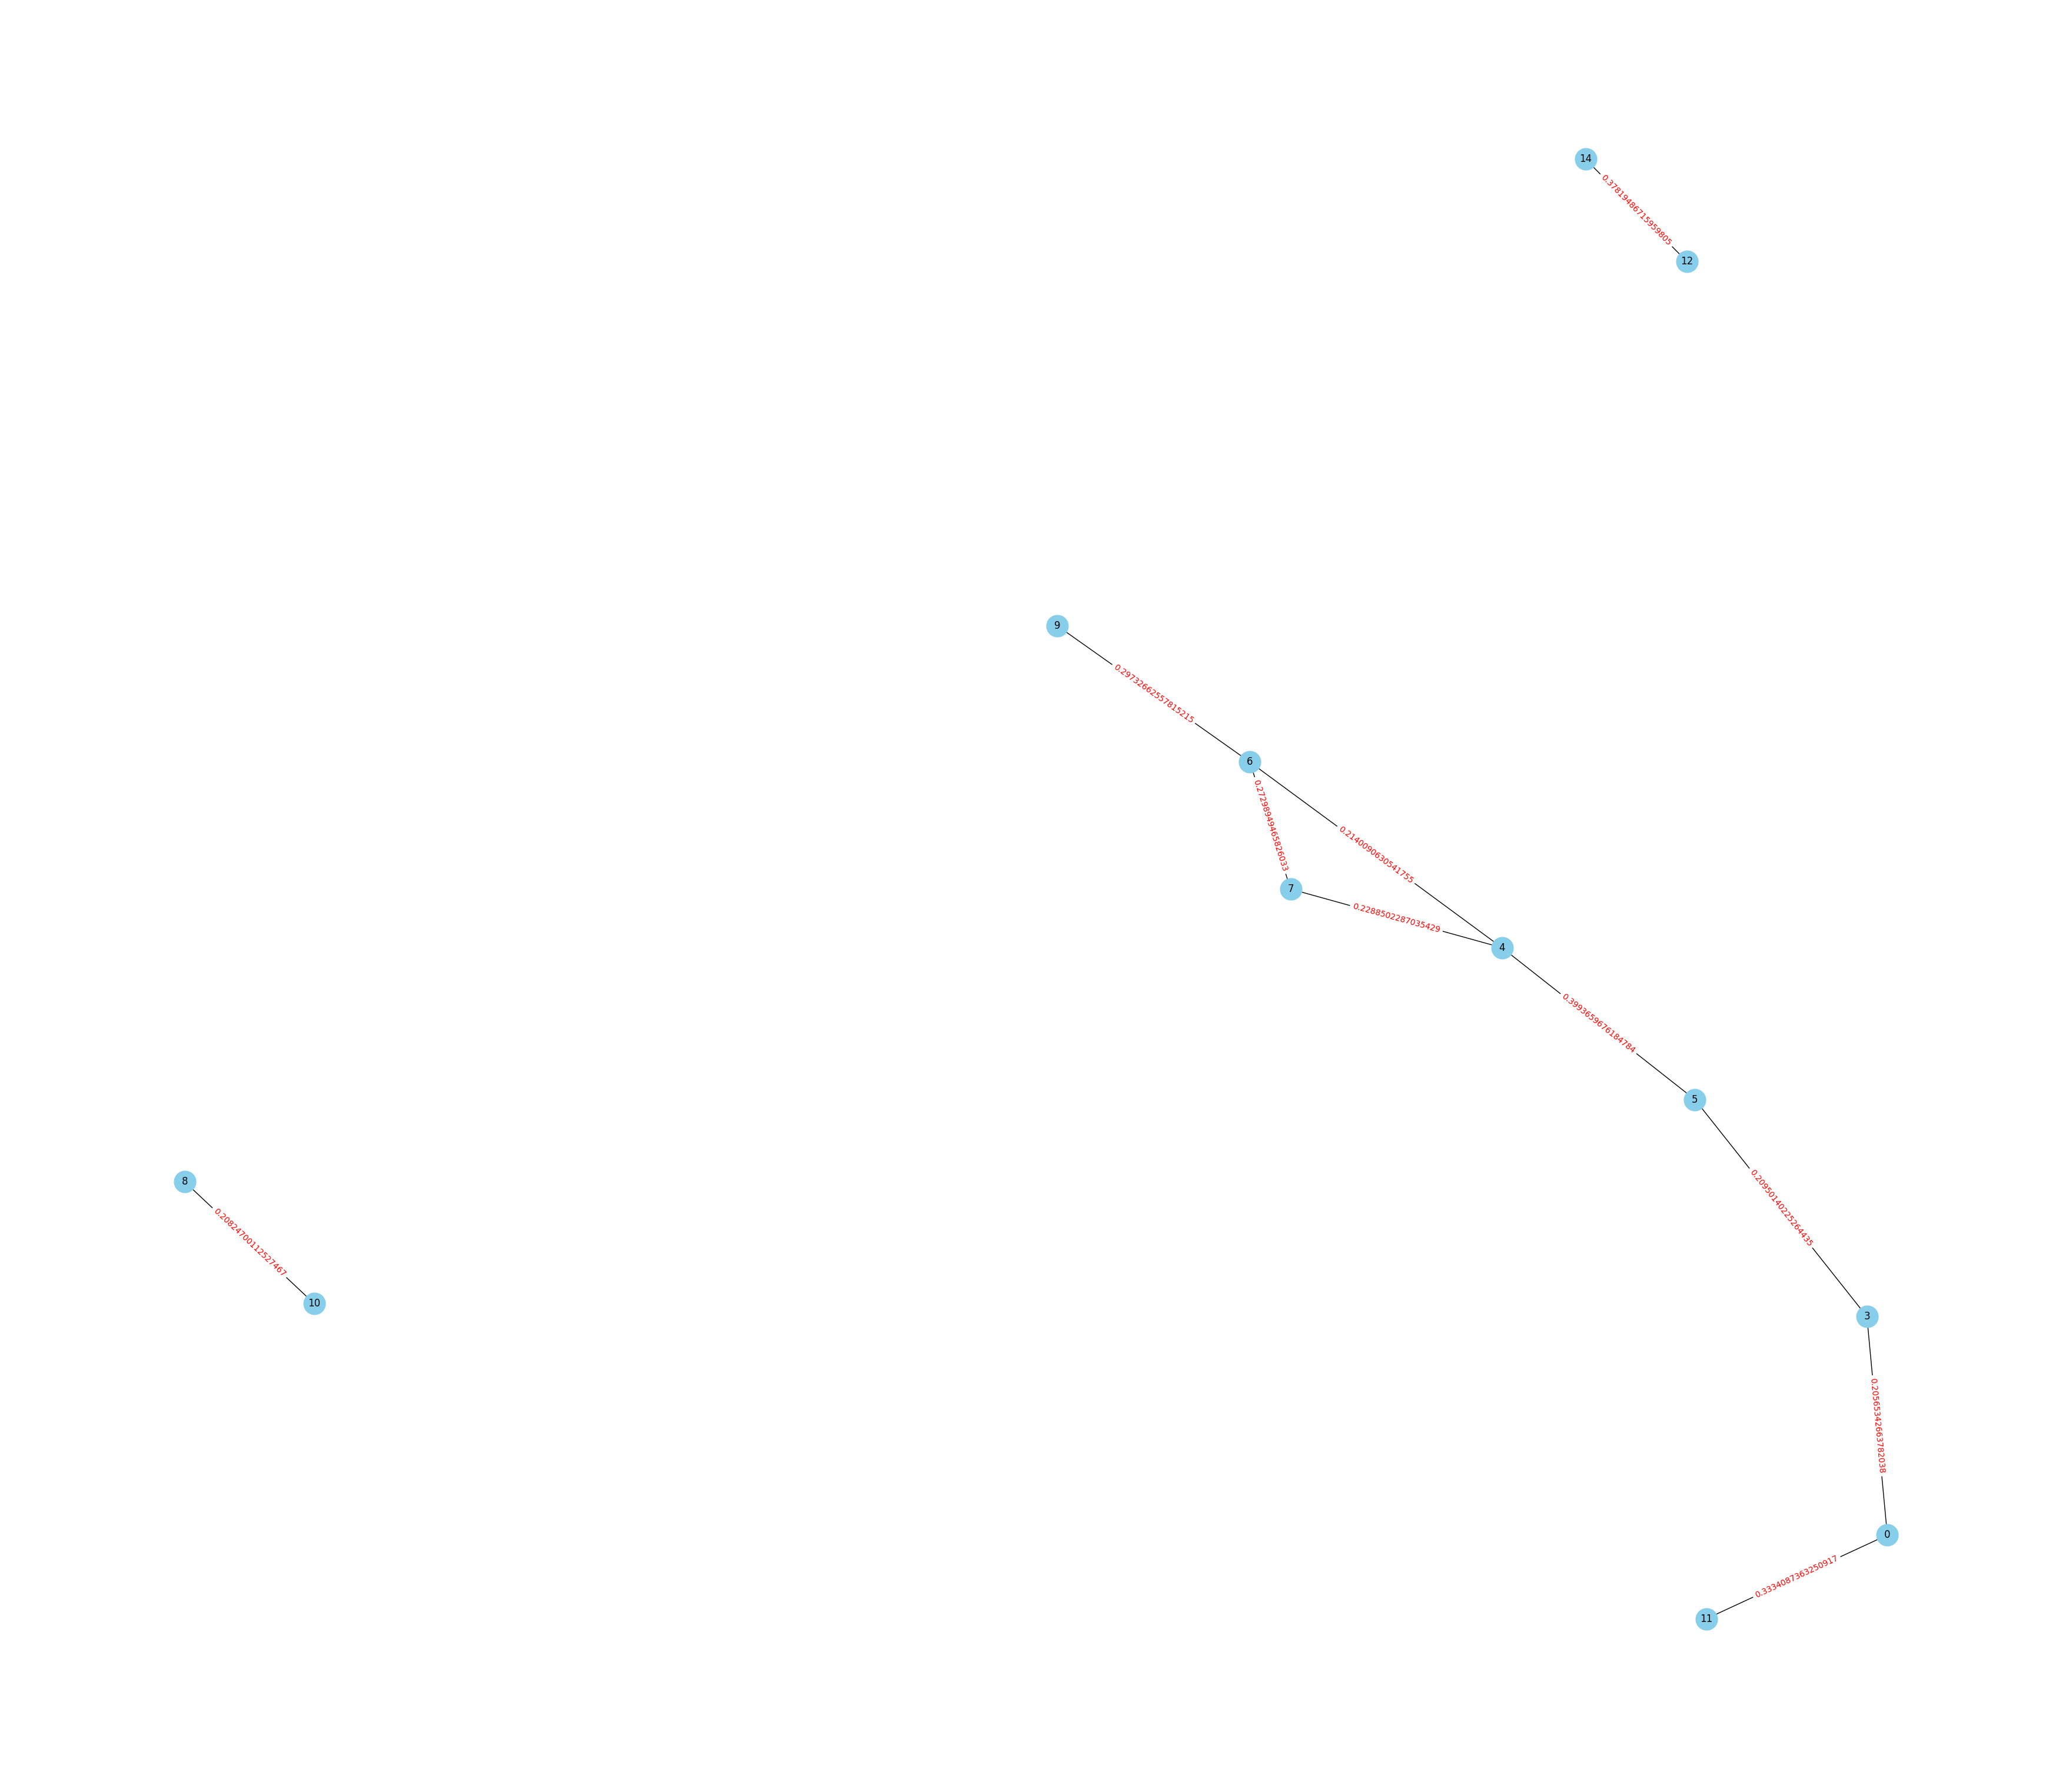

In [ ]:
plot_graph(G)

##Ringkasan Semua Data

In [ ]:
df["Summary"] = df.apply(lambda row : summarization(row['Tokenizing'], index=row.name+1, k=7, show_centrality=True)[0], axis=1)

Nilai Closeness Centrality Dokumen Ke - 1 : {0: 0.5714285714285714, 3: 0.631578947368421, 4: 0.6, 6: 0.631578947368421, 11: 0.4, 14: 0.5454545454545454, 1: 0.4, 5: 0.631578947368421, 10: 0.5217391304347826, 7: 0.6, 9: 0.46153846153846156, 8: 0.42857142857142855, 12: 0.3870967741935484}
Nilai Closeness Centrality Dokumen Ke - 2 : {0: 0.3902439024390244, 3: 0.47058823529411764, 9: 0.2857142857142857, 12: 0.2857142857142857, 17: 0.32653061224489793, 1: 0.23880597014925373, 2: 0.1951219512195122, 8: 0.2962962962962963, 4: 0.38095238095238093, 6: 0.4444444444444444, 13: 0.37209302325581395, 15: 0.36363636363636365, 7: 0.35555555555555557, 10: 0.37209302325581395, 11: 0.26666666666666666, 14: 0.3137254901960784, 16: 0.3137254901960784}
Nilai Closeness Centrality Dokumen Ke - 3 : {0: 0.37777777777777777, 8: 0.5862068965517241, 1: 0.38636363636363635, 5: 0.3469387755102041, 15: 0.53125, 2: 0.5862068965517241, 3: 0.53125, 4: 0.425, 6: 0.4146341463414634, 7: 0.5862068965517241, 11: 0.47222222222

##Memanggil Data Hasil Ringkasan

In [ ]:
new_df = df[["Summary", "Category"]]
new_df

,Summary,Category
0,"terkait dengan penjaminan sunatkhitan, sesuai ...",Finance
1,saat ditanya apakah waskita akan menjadi pasie...,Finance
2,"selain itu, sri mulyani mengatakan bahwa pemer...",Finance
3,pt pertamina gas pertagas yang merupakan bagia...,Finance
4,dorongan pelarangan total tembakau dan produk ...,Finance
...,...,...
1617,bagnaia memuncaki klasemen dengan perolehan 31...,Sport
1618,yamaha ingin mempunyai tim satelit lagi musim ...,Sport
1619,scroll to continue with content indonesia meno...,Sport
1620,sprint race motogp mandalika 2023 akan berlang...,Sport


In [ ]:
new_df.to_csv('Data Berita Hasil Ringkasan.csv')

##Modeling Data Ringkasan

Modeling Naive Bayes

In [ ]:
df["Summary"][0]

'terkait dengan penjaminan sunatkhitan, sesuai dengan peraturan presiden republik indonesia nomor 82 tahun 2018 bahwa tindakan sunatkhitan saat ini belum termasuk ke dalam penjaminan program jkn, ungkap ardi kepada detikcom, senin 27112023. scroll to continue with content meski begitu, ardi tidak menutup kemungkinan prosedur sunatkhitan ini bisa saja ditanggung bpjs. artinya selama ini biaya sunatkhitan sudah ditanggung pemerintah bila yang bersangkutan diharuskan secara medis untuk menerima prosedur medis itu. namun, apabila terdapat penyakit atau kondisi medis pada alat kelamin pria yang mengharuskan melakukan tindakan sunatkhitan, maka hal tersebut bisa dijamin oleh program jkn sesuai dengan indikasi medis, jelas ardi. sebab menurutnya biaya khitanan bisa saja ditanggung negara apabila yang bersangkutan memiliki penyakit atau kondisi medis tertentu yang mengharuskan dirinya melakukan tindakan tersebut. walaupun hal ini tidak untuk kondisi umum di mana yang bersangkutan tidak diwajib

In [ ]:
vectorizer_summary = TfidfVectorizer()
X_summary = vectorizer_summary.fit_transform(df["Summary"]).toarray()
y = df["Category"]

In [ ]:
X_train_summary, X_test_summary, y_train_summary, y_test_summary = train_test_split(X_summary, y, test_size=0.3, random_state=42)

In [ ]:
# Inisialisasi model Naive Bayes Gaussian
gnb_summary = GaussianNB()

# Melatih model menggunakan data latih
gnb_summary.fit(X_train_summary, y_train_summary)

# Membuat prediksi pada data uji
y_pred_gnb_summary = gnb_summary.predict(X_test_summary)

# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_gnb_summary)
print(f'Akurasi: {accuracy}')

Akurasi: 0.973305954825462


In [ ]:
report = classification_report(y_test_summary, y_pred_gnb_summary)
print(f'Report Klasifikasi:\n{report}')

Report Klasifikasi:
              precision    recall  f1-score   support

     Finance       0.98      0.97      0.97       253
       Sport       0.97      0.97      0.97       234

    accuracy                           0.97       487
   macro avg       0.97      0.97      0.97       487
weighted avg       0.97      0.97      0.97       487



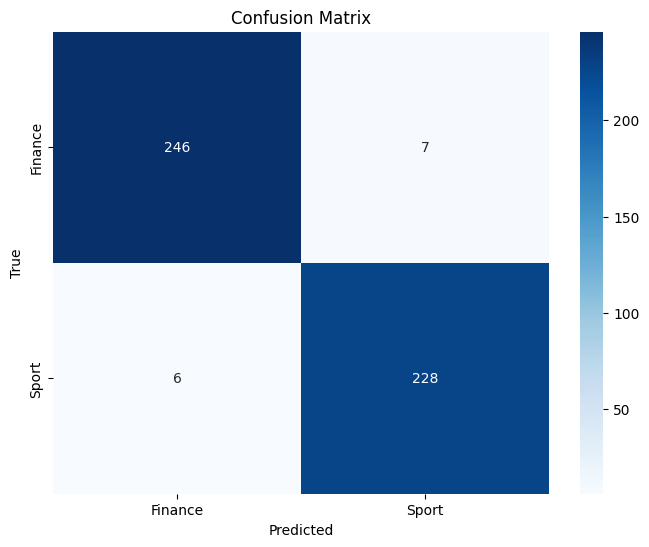

In [ ]:
def plot_confusion_matrix(cm):
  # Membuat plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gnb_summary.classes_, yticklabels=gnb_summary.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

cm = confusion_matrix(y_test_summary, y_pred_gnb_summary)
plot_confusion_matrix(cm)

##Prediksi Data

In [ ]:
new_data = ['Menteri Perdagangan Zulkifli Hasan atau Zulhas menjelaskan progres utang atau pembayaran selisih harga minyak goreng (rafaksi) 2022 kepada pengusaha. Zulhas mengatakan sampai saat ini pihak pemerintah memang belum memproses pembayaran utang tersebut kepada pengusaha.Adapun pembayaran utang rafaksi tersebut dilakukan oleh Badan Pengelola Dana Perkebunan Kelapa Sawit (BPDPKS). Namun, pembayaran itu harus atas rekomendasi Kemendag. Dapat kami sampaikan terkait dengan rafaksi minyak goreng di mana saat ini BPDPKS belum melakukan pembayaran dikarenakan Kemendag selaku lembaga verifikator belum menyampaikan hasil verifikasi yang dilakukan oleh PT Sucofindo kepada BPDKS, kata Zulhas dalam rapat dengan Kementerian Perdagangan dengan Komisi VI DPR RI, Senin (27/11/2023). Baca artikel detikfinance, Di Depan DPR Zulhas Buka-bukaan soal Utang Pemerintah ke Pengusaha Minyak Goreng']
new_data_summary, G = summarization(tokenizer(new_data[0]), k=5)
new_data_summary

'menteri perdagangan zulkifli hasan atau zulhas menjelaskan progres utang atau pembayaran selisih harga minyak goreng (rafaksi) 2022 kepada pengusaha. zulhas mengatakan sampai saat ini pihak pemerintah memang belum memproses pembayaran utang tersebut kepada pengusaha.adapun pembayaran utang rafaksi tersebut dilakukan oleh badan pengelola dana perkebunan kelapa sawit (bpdpks). dapat kami sampaikan terkait dengan rafaksi minyak goreng di mana saat ini bpdpks belum melakukan pembayaran dikarenakan kemendag selaku lembaga verifikator belum menyampaikan hasil verifikasi yang dilakukan oleh pt sucofindo kepada bpdks, kata zulhas dalam rapat dengan kementerian perdagangan dengan komisi vi dpr ri, senin (27/11/2023). baca artikel detikfinance, di depan dpr zulhas buka-bukaan soal utang pemerintah ke pengusaha minyak goreng'

In [ ]:
tfidf_Xnew_summary = vectorizer_summary.transform([new_data_summary]).toarray()
tfidf_Xnew_summary

array([[0.        , 0.        , 0.        , ..., 0.        , 0.41905254,
        0.10820978]])

In [ ]:
pred_gnb_summary = gnb_summary.predict(tfidf_Xnew_summary)
pred_gnb_summary[0]

'Finance'

In [ ]:
joblib.dump(gnb_summary, 'modelNB.pkl')

['modelNB.pkl']

Modeling Support Vectore Machine (SVM)

In [ ]:
svm_summary = SVC()

# Melatih model menggunakan data latih
svm_summary.fit(X_train_summary, y_train_summary)

# Membuat prediksi pada data uji
y_pred_svm_summary = svm_summary.predict(X_test_summary)

# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_svm_summary)
print(f'Akurasi: {accuracy}')

Akurasi: 0.9897330595482546


In [ ]:
report = classification_report(y_test_summary, y_pred_svm_summary)
print(f'Report Klasifikasi:\n{report}')

Report Klasifikasi:
              precision    recall  f1-score   support

     Finance       0.98      1.00      0.99       253
       Sport       1.00      0.98      0.99       234

    accuracy                           0.99       487
   macro avg       0.99      0.99      0.99       487
weighted avg       0.99      0.99      0.99       487



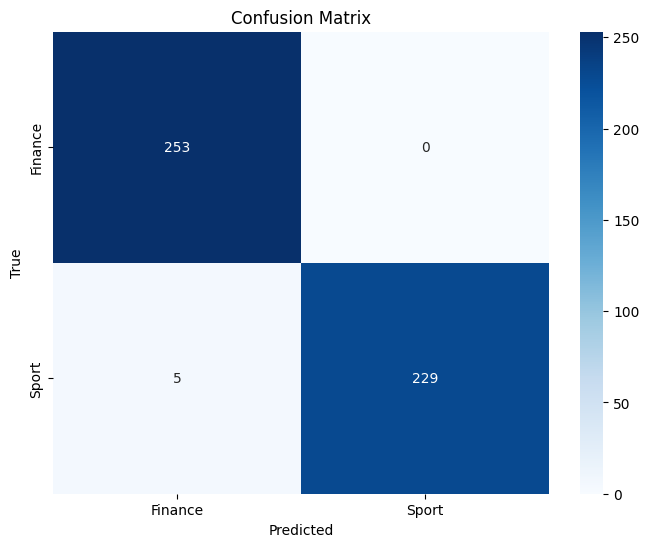

In [ ]:
def plot_confusion_matrix(cm):
  # Membuat plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_summary.classes_, yticklabels=svm_summary.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

cm = confusion_matrix(y_test_summary, y_pred_svm_summary)
plot_confusion_matrix(cm)

Prediksi

In [ ]:
new_data = ['Menteri Perdagangan Zulkifli Hasan atau Zulhas menjelaskan progres utang atau pembayaran selisih harga minyak goreng (rafaksi) 2022 kepada pengusaha. Zulhas mengatakan sampai saat ini pihak pemerintah memang belum memproses pembayaran utang tersebut kepada pengusaha.Adapun pembayaran utang rafaksi tersebut dilakukan oleh Badan Pengelola Dana Perkebunan Kelapa Sawit (BPDPKS). Namun, pembayaran itu harus atas rekomendasi Kemendag. Dapat kami sampaikan terkait dengan rafaksi minyak goreng di mana saat ini BPDPKS belum melakukan pembayaran dikarenakan Kemendag selaku lembaga verifikator belum menyampaikan hasil verifikasi yang dilakukan oleh PT Sucofindo kepada BPDKS, kata Zulhas dalam rapat dengan Kementerian Perdagangan dengan Komisi VI DPR RI, Senin (27/11/2023). Baca artikel detikfinance, Di Depan DPR Zulhas Buka-bukaan soal Utang Pemerintah ke Pengusaha Minyak Goreng']
new_data_summary, G = summarization(tokenizer(new_data[0]), k=5)
new_data_summary

'menteri perdagangan zulkifli hasan atau zulhas menjelaskan progres utang atau pembayaran selisih harga minyak goreng (rafaksi) 2022 kepada pengusaha. zulhas mengatakan sampai saat ini pihak pemerintah memang belum memproses pembayaran utang tersebut kepada pengusaha.adapun pembayaran utang rafaksi tersebut dilakukan oleh badan pengelola dana perkebunan kelapa sawit (bpdpks). dapat kami sampaikan terkait dengan rafaksi minyak goreng di mana saat ini bpdpks belum melakukan pembayaran dikarenakan kemendag selaku lembaga verifikator belum menyampaikan hasil verifikasi yang dilakukan oleh pt sucofindo kepada bpdks, kata zulhas dalam rapat dengan kementerian perdagangan dengan komisi vi dpr ri, senin (27/11/2023). baca artikel detikfinance, di depan dpr zulhas buka-bukaan soal utang pemerintah ke pengusaha minyak goreng'

In [ ]:
tfidf_Xnew_summary = vectorizer_summary.transform([new_data_summary]).toarray()
tfidf_Xnew_summary

array([[0.        , 0.        , 0.        , ..., 0.        , 0.41905254,
        0.10820978]])

In [ ]:
pred_svm_summary = svm_summary.predict(tfidf_Xnew_summary)
pred_svm_summary[0]

'Finance'

In [ ]:
joblib.dump(svm_summary, 'modelSVM.pkl')

['modelSVM.pkl']

In [ ]:
joblib.dump(vectorizer_summary, 'vectorizer.pkl')

['vectorizer.pkl']